In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import tensorflow_backend

config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

Using TensorFlow backend.


In [2]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()

In [3]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)

In [4]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 158 samples, validate on 18 samples
Epoch 1/100




158/158 [==============================] - 1s 5ms/step - loss: 0.4834 - val_loss: 0.1530
Epoch 2/100
158/158 [==============================] - 0s 290us/step - loss: 0.3279 - val_loss: 0.0630
Epoch 3/100
158/158 [==============================] - 0s 259us/step - loss: 0.2065 - val_loss: 0.0327
Epoch 4/100
158/158 [==============================] - 0s 283us/step - loss: 0.1194 - val_loss: 0.1015
Epoch 5/100
158/158 [==============================] - 0s 272us/step - loss: 0.0885 - val_loss: 0.2006
Epoch 6/100
158/158 [==============================] - 0s 270us/step - loss: 0.0973 - val_loss: 0.1663
Epoch 7/100
158/158 [==============================] - 0s 294us/step - loss: 0.0705 - val_loss: 0.0898
Epoch 8/100
158/158 [==============================] - 0s 284us/step - loss: 0.0423 - val_loss: 0.0409
Epoch 9/100
158/158 [============

In [6]:
predicted = model.predict(g)

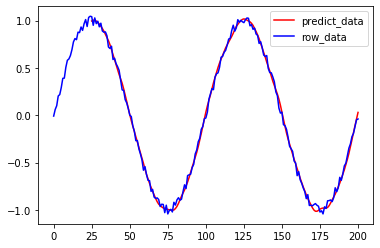

In [7]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()

### The following part for future prediction is under construction.

In [13]:
function = toy_problem(T=100)
data, label = make_dataset(function)
future_test = data[175].T

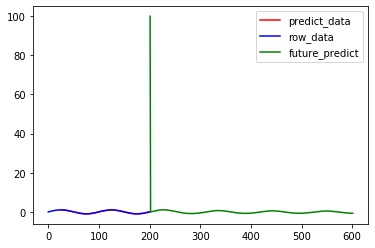

In [14]:
# 1つの学習データの時間の長さ -> 25

time_length = future_test.shape[1]
# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future_predict")
plt.legend()
plt.show()